In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
pd.pandas.set_option('display.max_columns',None)

In [102]:
## Loading the dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_df.csv")

In [123]:
df_test.shape

(1460, 75)

## 1. Exploratory data analysis

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
nan_cols = [i for i in df_train.columns if df_train[i].isnull().sum()>=1]
print(nan_cols)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
pd.set_option('display.max_rows', None)
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(['percent_missing'], ascending=False)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


In [10]:
df_train = df_train.loc[:, df_train.isnull().mean() < .8] ## drop column having nan value more than 80%

In [11]:
df_train.shape

(1460, 77)

In [12]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [70]:
#categorical columns
df_train_categorical = df_train.select_dtypes(include=['object']).columns.tolist() 
print(len(df_train_categorical))

39


In [14]:
#numerical columns
df_train_numeric = df_train.select_dtypes(exclude=['object']).columns.tolist()

In [15]:
df_year_feature = [year_feature for year_feature in df_train_numeric if 'Yr' in year_feature or 'Year' in year_feature ]
print(df_year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


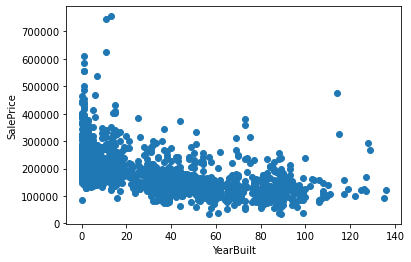

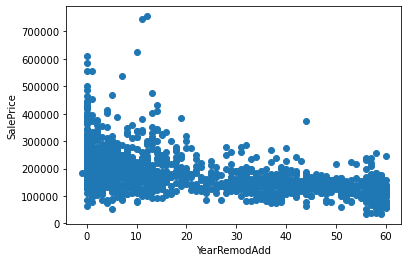

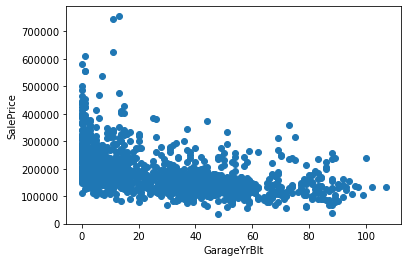

In [16]:
for feature in df_year_feature:
    if feature!= 'YrSold':
        data = df_train.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
    
    

In [17]:
df_train.duplicated().sum()

0

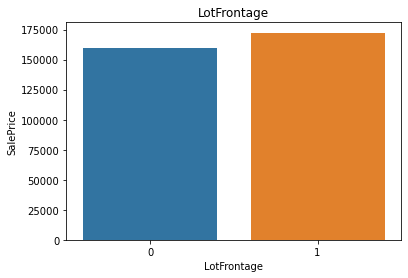

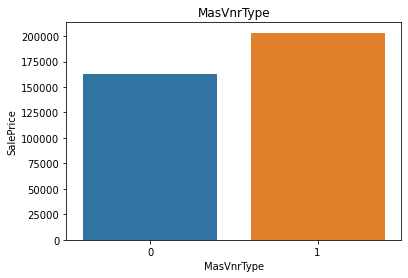

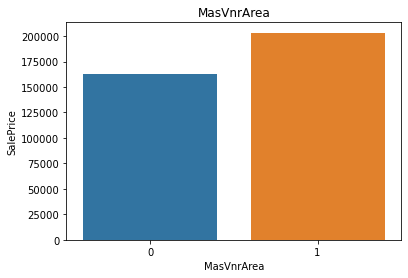

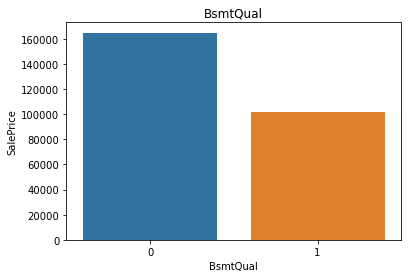

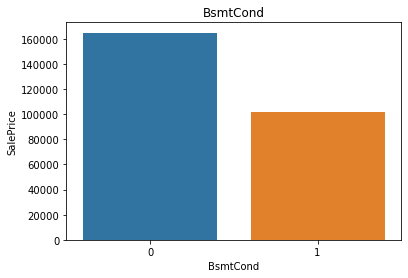

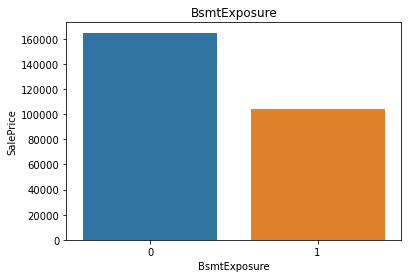

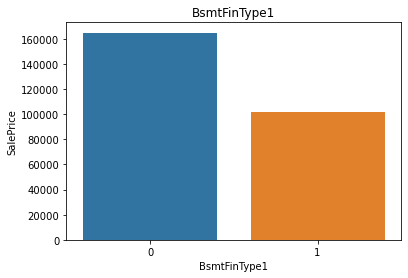

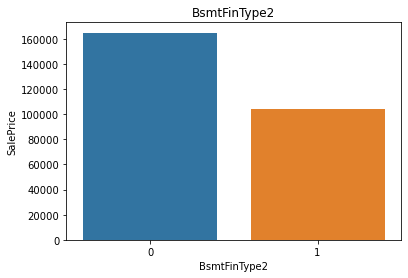

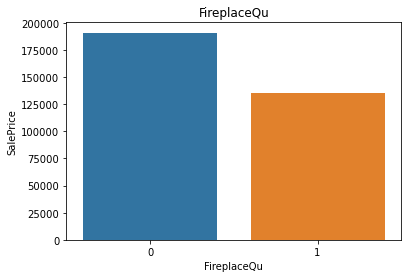

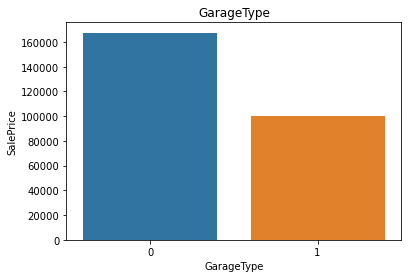

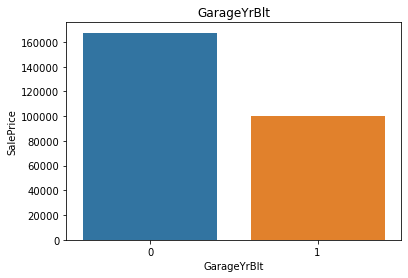

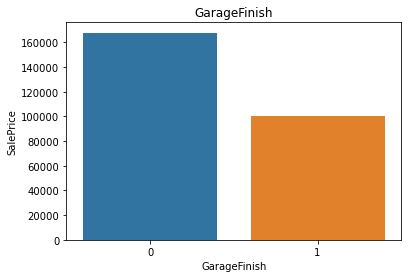

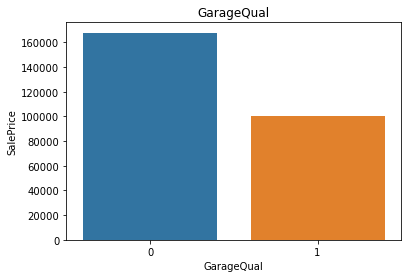

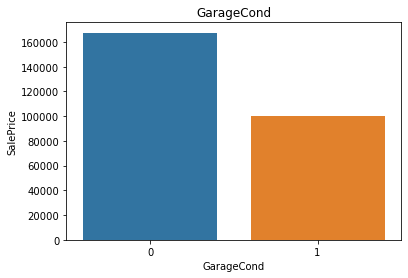

In [18]:
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
for feature in features_with_na:
    data = df_train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    sns.barplot(x=feature, y='SalePrice', data=data, ci=False, estimator=np.median)
    plt.title(feature)
    plt.show()
    
    
#relationship between missing values feature and taregt feature, and trying to observe how does missing effect the sales price
#as we can see below that due to missing values meadian sales price is incerasing and for few features median sales price is decreasing   

Text(0.5, 1.0, 'House Price vs YearSold')

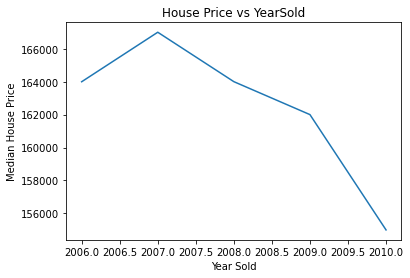

In [19]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [20]:
discrete_df = [feature for feature in df_train_numeric if len(df_train[feature].unique())<25 and feature not in df_year_feature+["ID"] ]

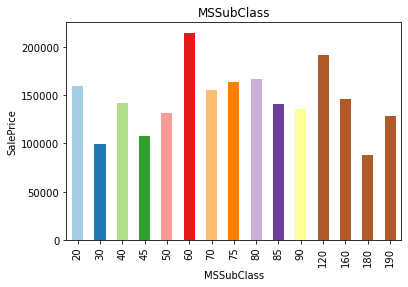

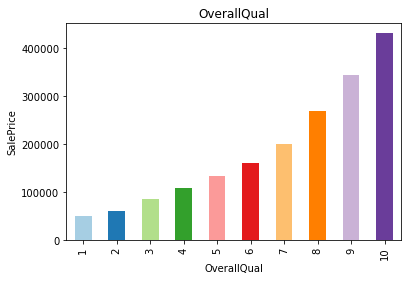

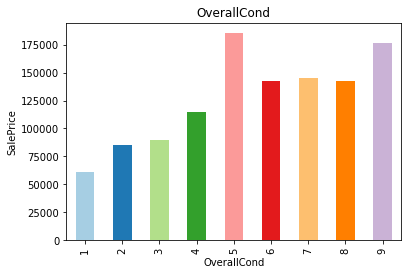

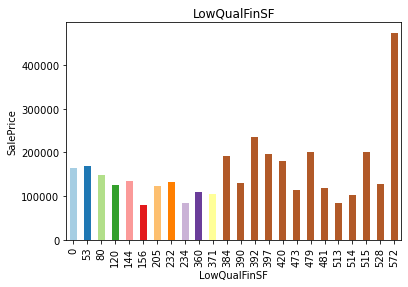

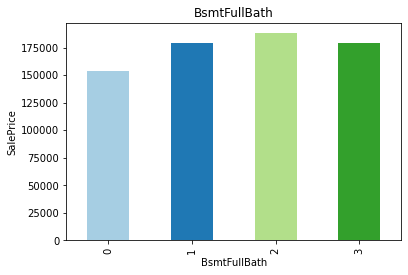

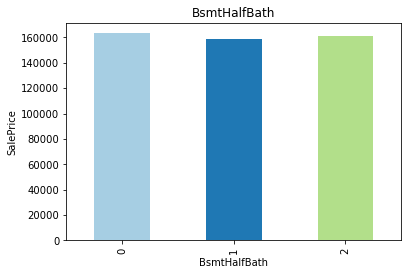

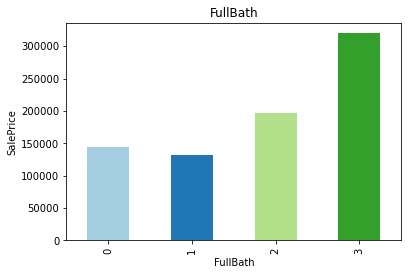

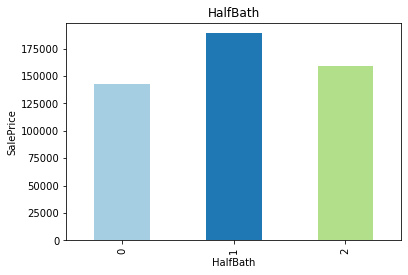

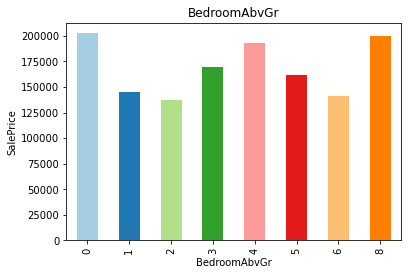

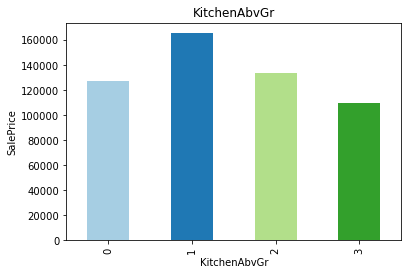

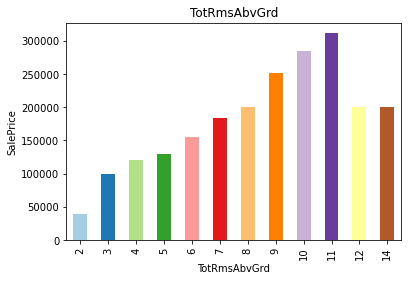

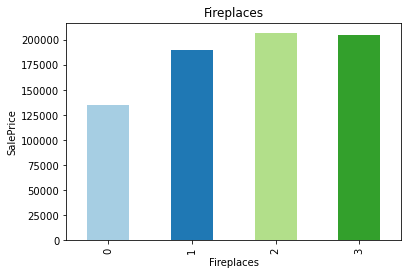

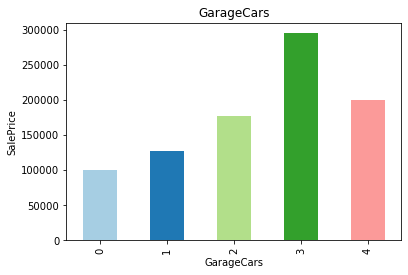

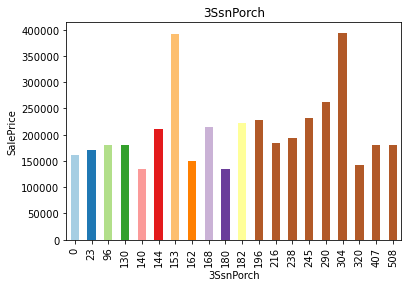

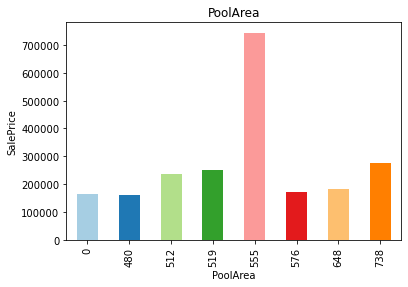

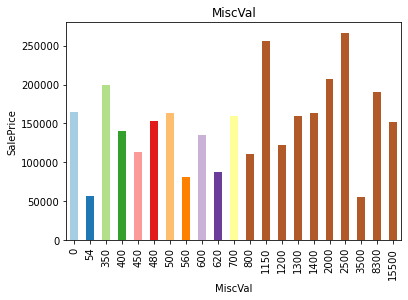

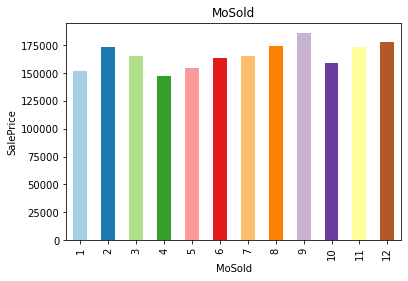

In [21]:
for feature in discrete_df:
    N=25
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=plt.cm.Paired(np.arange(N)))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [22]:
continous_df = [feature for feature in df_train_numeric if feature not in discrete_df+['Id']+df_year_feature+['SalePrice']]

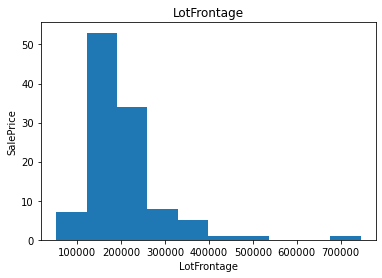

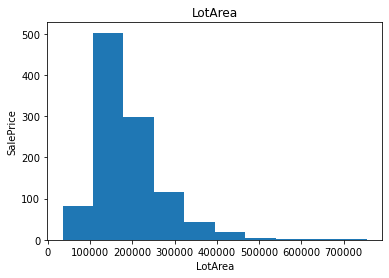

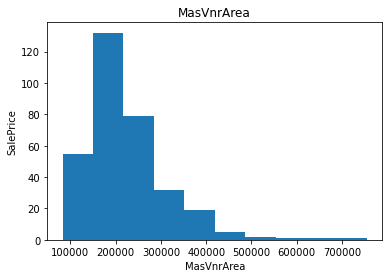

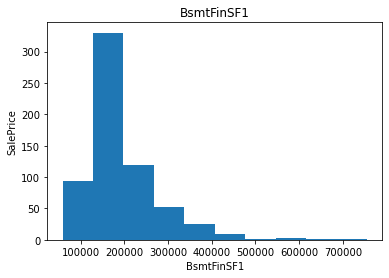

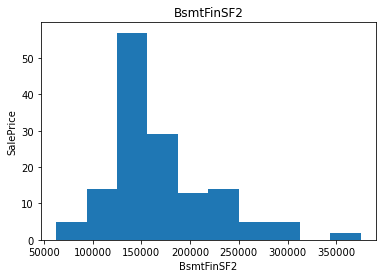

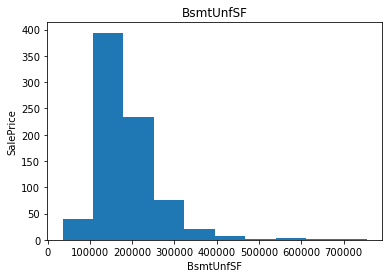

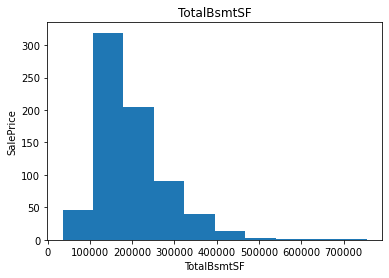

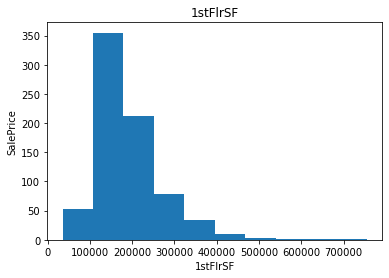

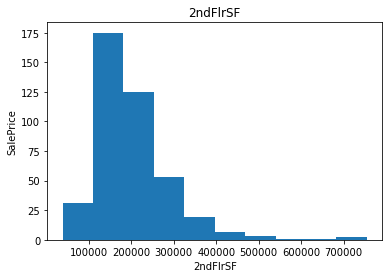

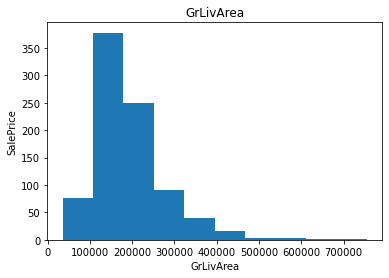

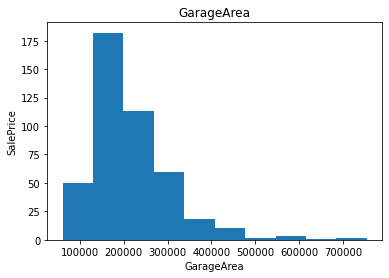

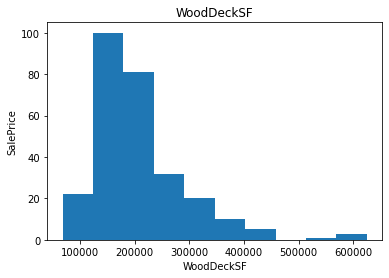

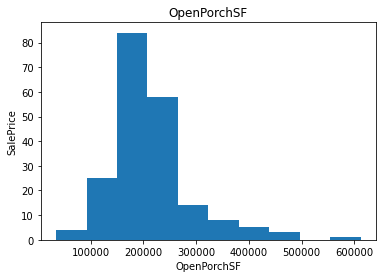

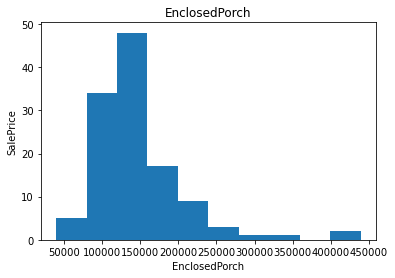

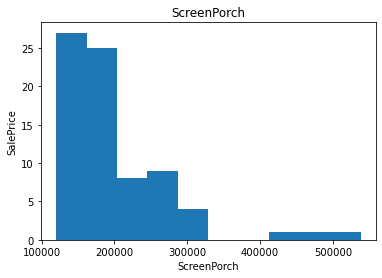

In [23]:
for feature in continous_df:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

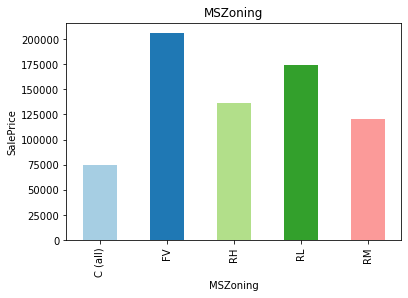

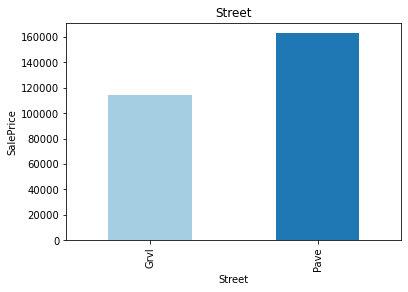

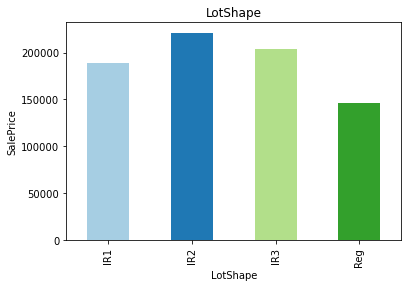

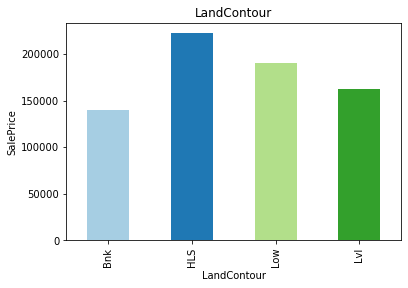

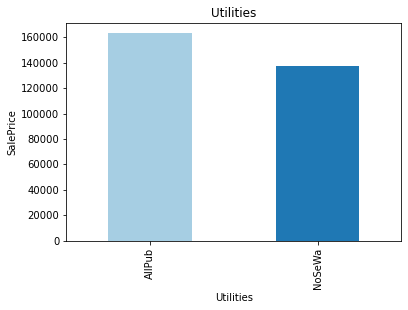

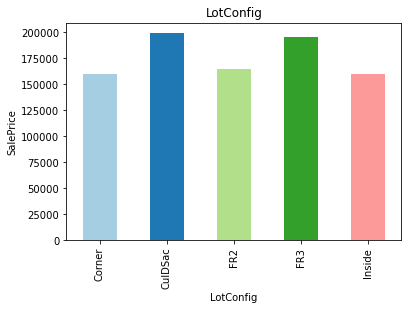

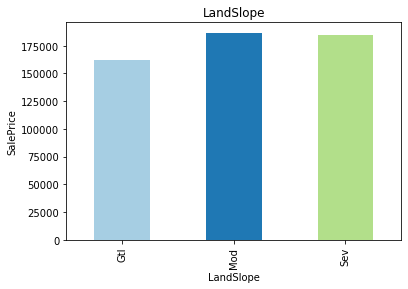

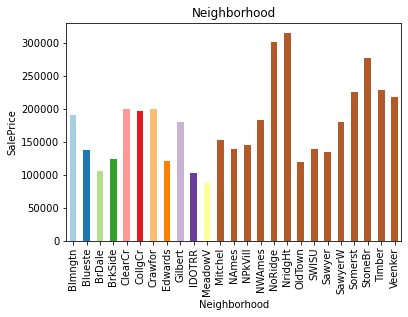

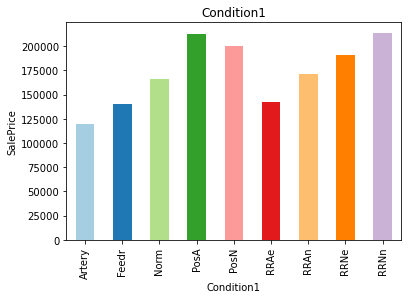

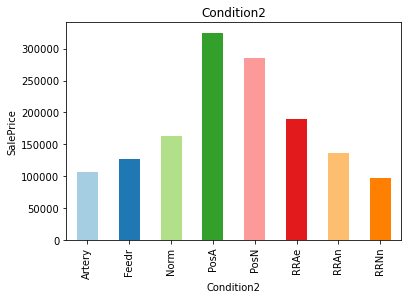

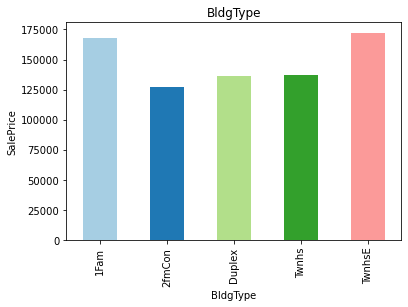

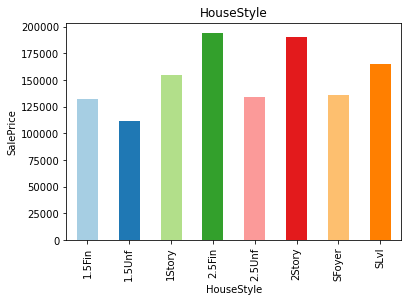

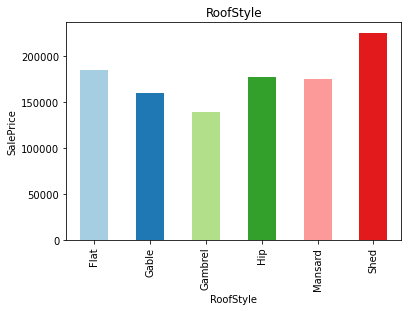

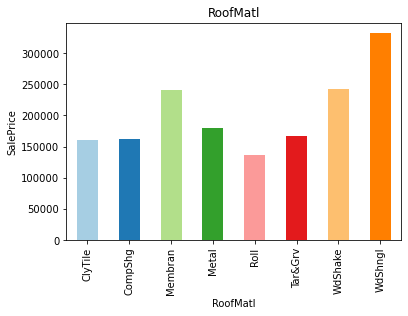

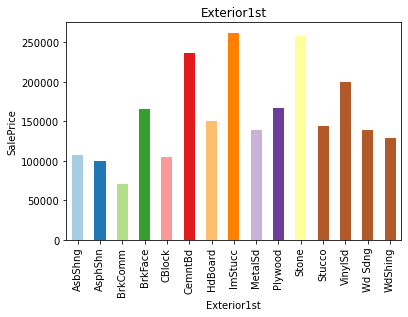

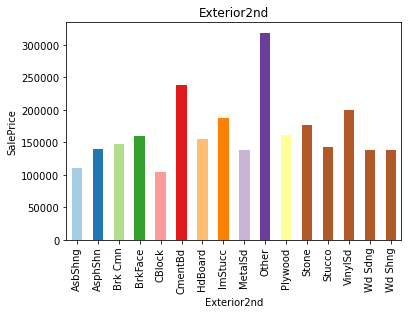

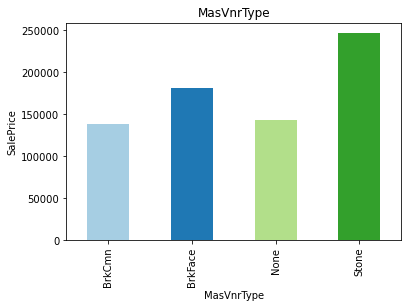

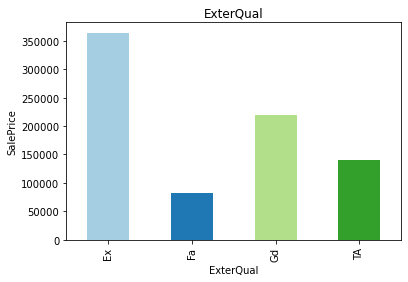

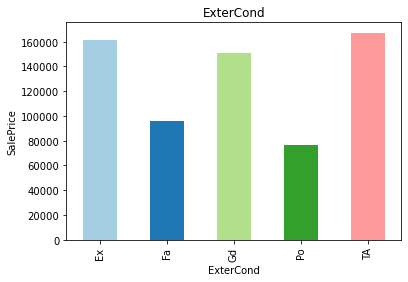

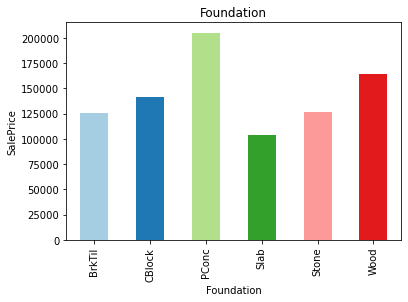

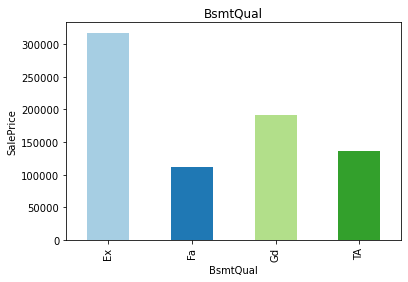

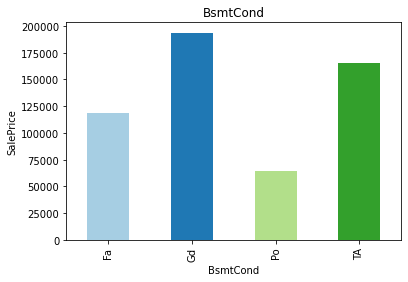

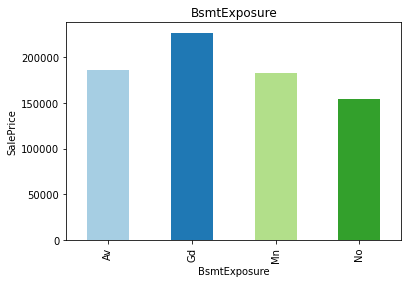

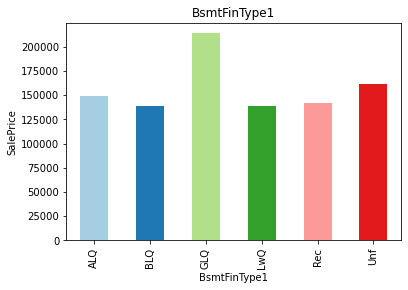

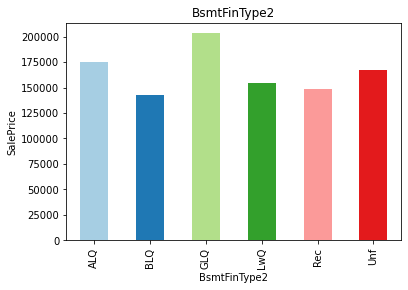

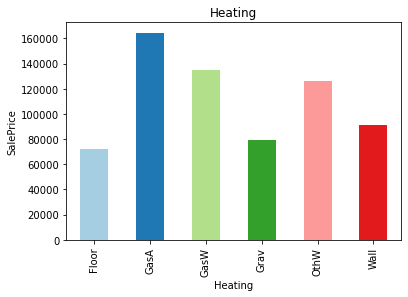

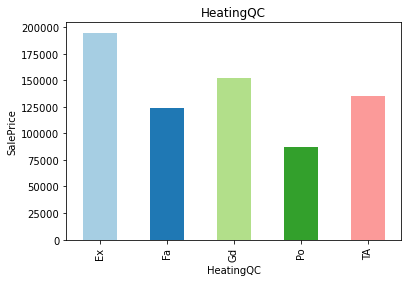

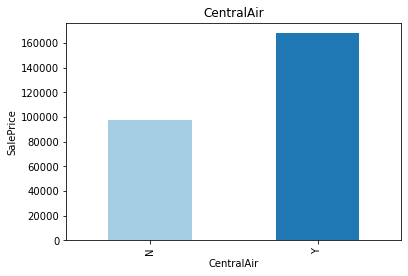

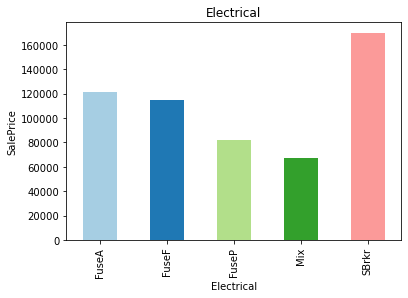

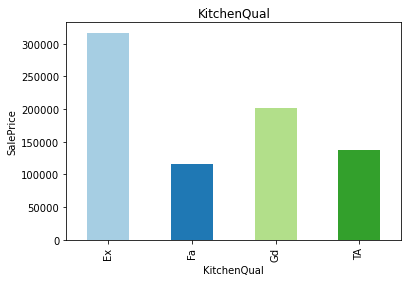

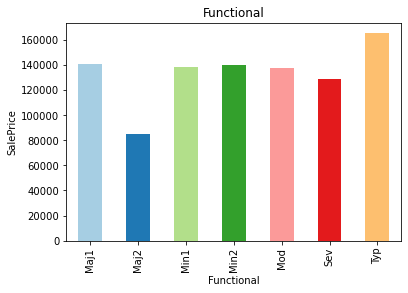

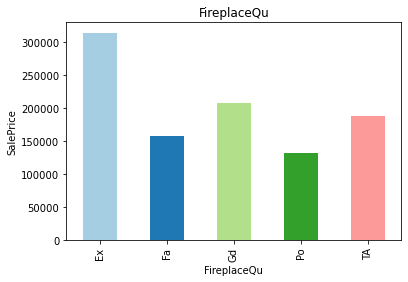

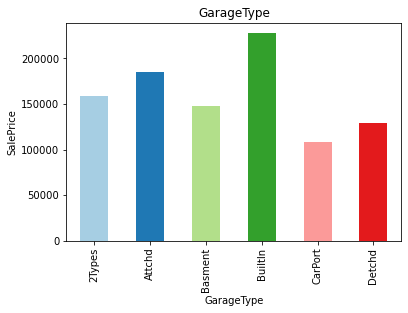

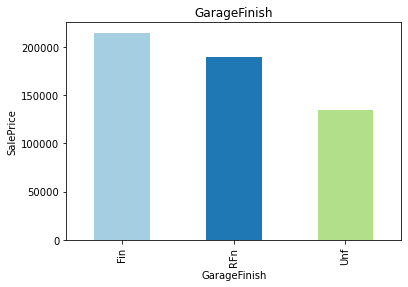

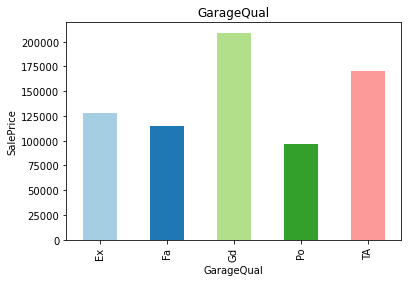

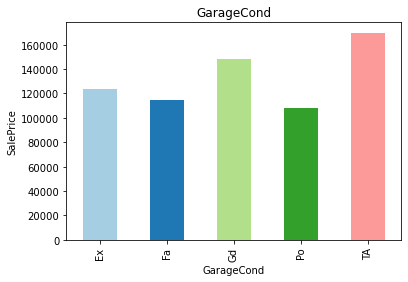

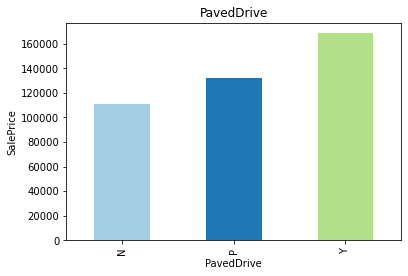

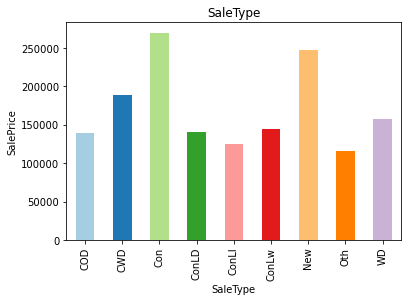

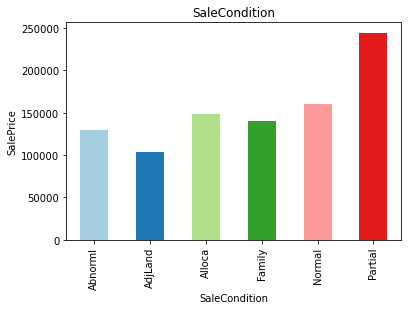

In [24]:
for feature in df_train_categorical:
    N=25
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=plt.cm.Paired(np.arange(N)))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    

# Feature Engineering
#### in this section we will perform below task
#### 1. Handle Missing values
#### 2. Handle Categorical Variable
#### 3. Handle Imbalance or skewd data
#### 4. Handle Outliers



## 1.Handling Missing Values

In [25]:
numerical_with_nan=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']
numerical_with_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [26]:
# print(features_with_na)
# med = df_train['LotFrontage'].median()
# print(med)
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df_train[feature].median()
#     median_value_test = df_test[feature].median()
    
    ## create a new feature to capture nan values
    df_train[feature+'nan']=np.where(df_train[feature].isnull(),1,0)
    df_train[feature].fillna(median_value,inplace=True)
#     df_test[feature].fillna(median_value,inplace=True)
    
df_test[numerical_with_nan].isnull().sum()

LotFrontage    227
MasVnrArea      15
GarageYrBlt     78
dtype: int64

In [27]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y

## 2. Handling Tamporal Variable

In [28]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df_train[feature]=df_train['YrSold']-df_train[feature]

In [29]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,0,0


In [30]:
df_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


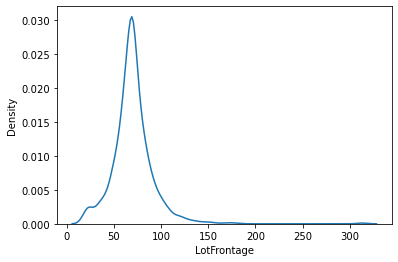

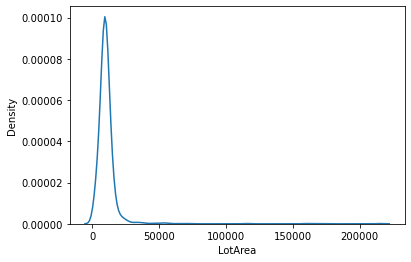

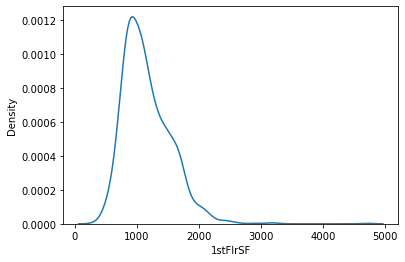

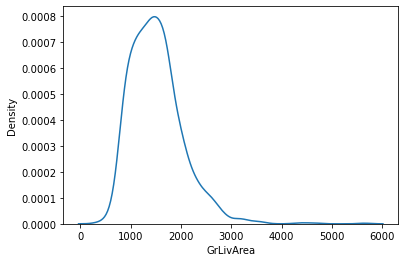

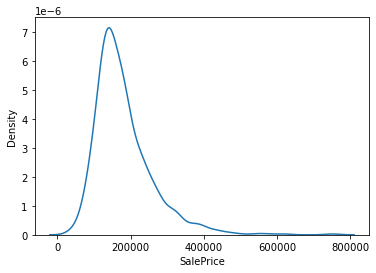

In [31]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features:
    sns.kdeplot(data=df_train, x=feature,  legend=True)
    plt.show()

## Remove Outliers

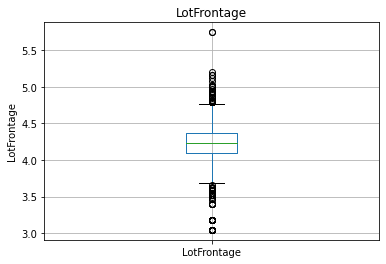

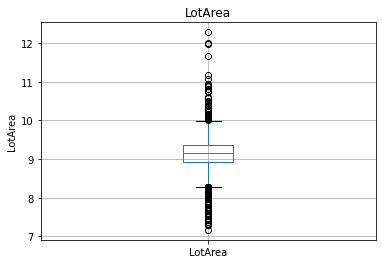

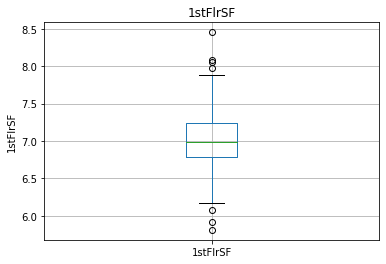

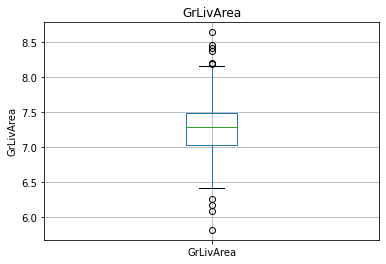

In [32]:
# check for outlier first using boxplot
for feature in continous_df:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [33]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df_train[feature]=np.log(df_train[feature])

In [34]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216,0,0,0


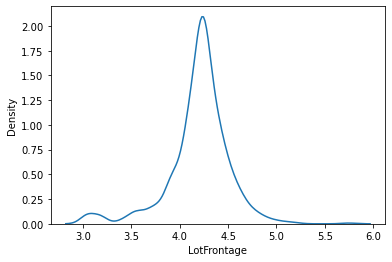

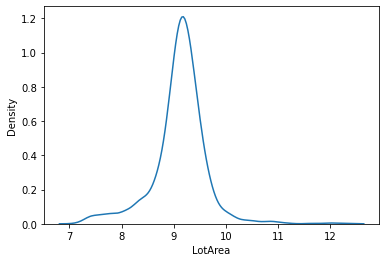

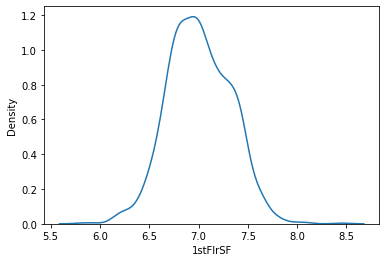

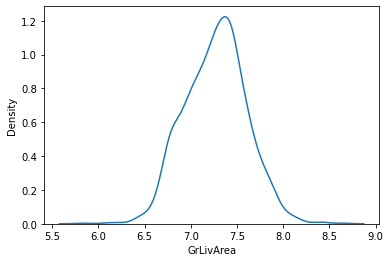

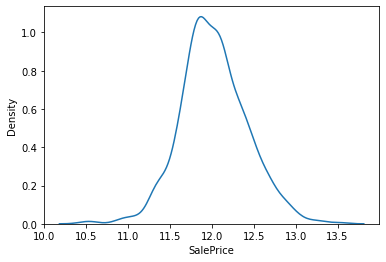

In [35]:
for feature in num_features:
    sns.kdeplot(data=df_train, x=feature,  legend=True)
    plt.show()

In [36]:
def iqr_feature(features, df_train):
    dict = {}
    max_lmt = []
    min_lmt=[]
    for feature in features:
        q1 = df_train[feature].quantile(0.25)
        q2 = df_train[feature].quantile(0.75)
        IQR = q2 - q1
#         iqr.append(IQR)
        max_limit = q2 + (1.5 * IQR)
        max_lmt.append(max_limit)
        min_limit = q1 - (1.5 * IQR) 
        min_lmt.append(min_limit)
#         dict.update({feature: [min_limit,max_limit]})
#     return dict
    return max_lmt, min_lmt
    
max_lmt, min_lmt= iqr_feature(num_features, df_train)
min_lmt
# iqr_feature(num_features, df_train)

[3.681689626854719,
 8.286079964443722,
 6.098543358767717,
 6.350013807614906,
 11.027146428351426]

In [37]:
s1 = pd.Series(max_lmt)
s2 = pd.Series(min_lmt)


df = pd.DataFrame(list(zip(num_features,s1, s2)), columns=['num_features','max_lmt','min_lmt'])
df
    

,num_features,max_lmt,min_lmt
0,LotFrontage,4.782103,3.681690
1,LotArea,10.002575,8.286080
2,1stFlrSF,7.921607,6.098543
3,GrLivArea,8.162057,6.350014
4,SalePrice,13.021682,11.027146


In [38]:
df_train.shape

(1460, 80)

In [39]:
df_main = df_train.copy()

In [40]:
df_train.drop(['Id'],axis=1, inplace = True)

In [41]:
df_new = df_train[(df_train["LotFrontage"]>3.681690) & (df_train["LotFrontage"]<4.782103)]
df_new.shape
# df_train["LotFrontage"]= np.where(((df_train["LotFrontage"]<3.681690) | (df_train["LotFrontage"]>4.782103)), df_train['LotFrontage'].median(),df_train['LotFrontage'])

(1337, 79)

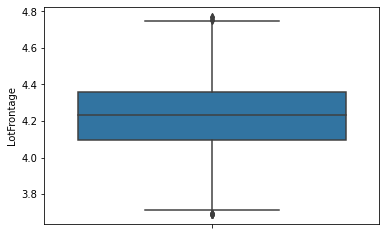

In [42]:
sns.boxplot( y=df_new["LotFrontage"]);
plt.show()

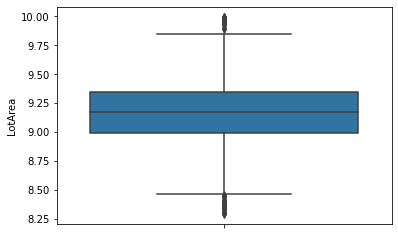

In [43]:
df_new = df_new[(df_new["LotArea"]>8.286080) & (df_new["LotArea"]<10.002575)]
# df_train["LotArea"]= np.where(((df_train["LotArea"]<8.286080) | (df_train["LotArea"]>10.002575)), df_train['LotArea'].median(),df_train['LotArea'])
sns.boxplot( y=df_new["LotArea"]);
plt.show()

In [44]:
df_new = df_new[(df_new["1stFlrSF"]>6.098543) & (df_new["1stFlrSF"]<7.921607)]
df_new.shape
# df_train["1stFlrSF"]= np.where(((df_train["1stFlrSF"]<6.098543) | (df_train["1stFlrSF"]>7.921607)), df_train['1stFlrSF'].median(),df_train['1stFlrSF'])

(1266, 79)

In [45]:
df_new = df_new[(df_new["GrLivArea"]>6.350014) & (df_new["GrLivArea"]<8.162057)]
df_new.shape
# df_train["GrLivArea"]= np.where(((df_train["GrLivArea"]<6.350014) | (df_train["GrLivArea"]>8.162057)), df_train['GrLivArea'].median(),df_train['GrLivArea'])

(1263, 79)

In [46]:
# df_new.shape

In [47]:
df_new = df_new[(df_new["SalePrice"]>11.027146) & (df_new["SalePrice"]<13.021682)]
df_new.shape
# df_train["SalePrice"]= np.where(((df_train["SalePrice"]<11.027146) | (df_train["SalePrice"]>13.021682)), df_train['SalePrice'].median(),df_train['SalePrice'])

(1246, 79)

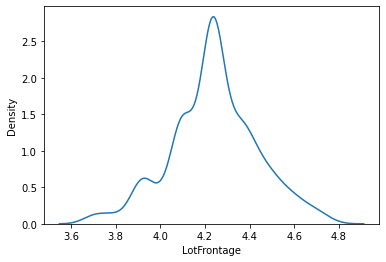

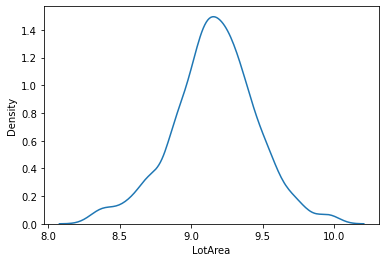

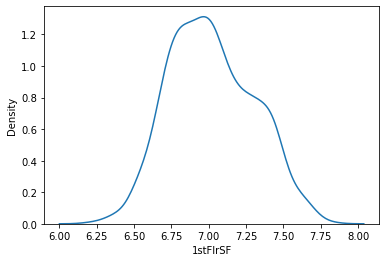

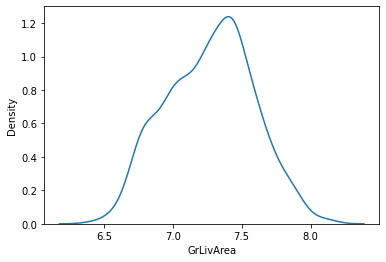

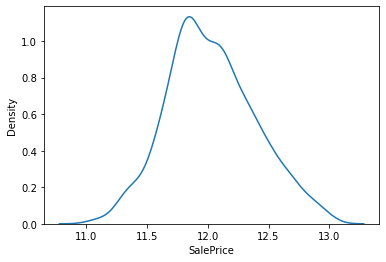

In [48]:
for feature in num_features:
    sns.kdeplot(data=df_new, x=feature,  legend=True)
    plt.show()

## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [49]:
categorical_features=[feature for feature in df_new.columns if df_new[feature].dtype=='O']

In [50]:
for feature in categorical_features:
    print((df_new[feature].value_counts()))

RL         1033
RM          152
FV           42
RH           14
C (all)       5
Name: MSZoning, dtype: int64
Pave    1244
Grvl       2
Name: Street, dtype: int64
Reg    783
IR1    431
IR2     28
IR3      4
Name: LotShape, dtype: int64
Lvl    1137
Bnk      51
HLS      40
Low      18
Name: LandContour, dtype: int64
AllPub    1245
NoSeWa       1
Name: Utilities, dtype: int64
Inside     895
Corner     234
CulDSac     75
FR2         40
FR3          2
Name: LotConfig, dtype: int64
Gtl    1194
Mod      49
Sev       3
Name: LandSlope, dtype: int64
NAmes      216
CollgCr    142
OldTown     99
Edwards     84
NWAmes      73
Sawyer      73
Gilbert     70
NridgHt     63
Somerst     63
SawyerW     59
BrkSide     53
Crawfor     47
Mitchel     39
NoRidge     32
Timber      31
IDOTRR      30
SWISU       24
StoneBr     19
ClearCr     14
Veenker      7
NPkVill      4
Blmngtn      2
MeadowV      2
Name: Neighborhood, dtype: int64
Norm      1063
Feedr       74
Artery      42
RRAn        25
PosN        18
R

In [51]:
for feature in categorical_features:
    temp=df_new.groupby(feature)['SalePrice'].count()/len(df_new)
    temp_df=temp[temp>0.01].index
    df_new[feature]=np.where(df_new[feature].isin(temp_df),df_new[feature],'Rare_var')
    

In [52]:
df_new.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Rare_var,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694,0,0,0
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,0,0,0
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167,0,0,0
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216,0,0,0
5,50,RL,4.442651,9.554993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Rare_var,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,11.870600,0,0,0
6,20,RL,4.317488,9.218705,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,12.634603,0,0,0
7,60,RL,4.234107,9.247829,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,12.206073,1,0,0
8,50,RM,3.931826,8.719317,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,6.929517,752,0,7.480992,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,11.774520,0,0,0
9,190,RL,3.912023,8.911934,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Rare_var,2fmCon,1.5Unf,5,6,69,58,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,U

#### Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [53]:
## Target guided Order Encoding
for feature in categorical_features:
    labels_ordered=df_new.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_new[feature]=df_new[feature].map(labels_ordered)

In [54]:
df_new.shape

(1246, 79)

In [64]:
df_new.drop(['LotFrontagenan','GarageYrBltnan','MasVnrAreanan'], axis=1, inplace=True)

In [65]:
df_new.shape

(1246, 76)

In [72]:
x_data=df_new.drop('SalePrice',axis=1)
y_data=df_new['SalePrice']

In [73]:
x_data.shape

(1246, 75)

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 1318 to 842
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     996 non-null    int64  
 1   MSZoning       996 non-null    int64  
 2   LotFrontage    996 non-null    float64
 3   LotArea        996 non-null    float64
 4   Street         996 non-null    int64  
 5   LotShape       996 non-null    int64  
 6   LandContour    996 non-null    int64  
 7   Utilities      996 non-null    int64  
 8   LotConfig      996 non-null    int64  
 9   LandSlope      996 non-null    int64  
 10  Neighborhood   996 non-null    int64  
 11  Condition1     996 non-null    int64  
 12  Condition2     996 non-null    int64  
 13  BldgType       996 non-null    int64  
 14  HouseStyle     996 non-null    int64  
 15  OverallQual    996 non-null    int64  
 16  OverallCond    996 non-null    int64  
 17  YearBuilt      996 non-null    int64  
 18  YearRem

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [76]:
X_train_scaled.shape, X_test_scaled.shape

((996, 75), (250, 75))

In [77]:
scaler.mean_

array([5.03162651e+01, 2.87449799e+00, 4.24352754e+00, 9.16036341e+00,
       9.97991968e-01, 4.04618474e-01, 1.04216867e+00, 9.98995984e-01,
       1.97289157e+00, 1.03915663e+00, 8.61244980e+00, 2.81124498e+00,
       9.87951807e-01, 1.95883534e+00, 4.15461847e+00, 6.09236948e+00,
       5.61345382e+00, 3.74146586e+01, 2.36435743e+01, 4.20682731e-01,
       1.20481928e-02, 6.17469880e+00, 6.20582329e+00, 1.55020080e+00,
       9.85130522e+01, 1.37449799e+00, 2.84036145e+00, 2.72891566e+00,
       2.48594378e+00, 1.95883534e+00, 1.60240964e+00, 4.23192771e+00,
       4.31756024e+02, 3.69277108e+00, 4.78915663e+01, 5.74038153e+02,
       1.05368574e+03, 1.96887550e+00, 3.12951807e+00, 9.35742972e-01,
       2.87851406e+00, 7.02160808e+00, 3.43916667e+02, 4.83232932e+00,
       7.27492894e+00, 4.12650602e-01, 5.72289157e-02, 1.55923695e+00,
       3.75502008e-01, 2.93674699e+00, 1.05421687e+00, 1.48594378e+00,
       6.59538153e+00, 2.87650602e+00, 6.09437751e-01, 2.29518072e+00,
      

In [78]:
X_train_scaled

array([[-0.88888017,  0.26155722, -0.04802579, ..., -1.36567164,
        -0.01080554,  0.18107825],
       [-0.88888017,  0.26155722, -0.04802579, ..., -1.36567164,
        -0.01080554, -3.33231016],
       [-0.88888017,  0.26155722,  0.70602966, ...,  0.1414851 ,
        -0.01080554,  0.18107825],
       ...,
       [-0.88888017,  0.26155722, -0.76049308, ...,  0.1414851 ,
        -4.3157325 , -3.33231016],
       [-0.00927297, -1.82253073, -0.76049308, ..., -0.61209327,
        -0.01080554,  0.18107825],
       [ 0.87033424,  0.26155722,  0.83190569, ...,  0.1414851 ,
        -0.01080554,  0.18107825]])

In [80]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)

In [81]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [82]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

4

In [83]:
corr_features

{'1stFlrSF', 'GarageArea', 'GrLivArea', 'LotArea'}

In [109]:
X_train_scaled.drop(corr_features, axis=1)
X_test_scaled.drop(corr_features, axis=1)
df_test.drop(corr_features, axis=1)
df_test.drop(["Id"], axis=1, inplace = True)


In [110]:
X_train_scaled.shape,X_test_scaled.shape, df_test.shape

((996, 75), (250, 75), (1460, 75))

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [87]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train_scaled, y_train)
mutual_info

array([2.39157780e-01, 1.00166043e-01, 1.85048667e-01, 1.28172491e-01,
       1.01414532e-06, 6.01385469e-02, 1.61502065e-02, 0.00000000e+00,
       2.65476423e-02, 0.00000000e+00, 4.93128400e-01, 2.09414875e-02,
       0.00000000e+00, 3.18233349e-02, 1.34575969e-01, 5.90306164e-01,
       1.43140094e-01, 3.73080286e-01, 3.01199054e-01, 3.04402121e-02,
       2.45275280e-03, 1.60292179e-01, 1.84994526e-01, 1.19043202e-01,
       1.00362119e-01, 3.42155868e-01, 5.79299676e-03, 2.10584444e-01,
       3.39488312e-01, 4.34448007e-02, 9.04256589e-02, 1.53511321e-01,
       1.18918270e-01, 3.15301385e-02, 2.09202782e-02, 1.76188996e-01,
       3.09449404e-01, 1.27214292e-02, 1.43983274e-01, 5.98634417e-02,
       5.78130507e-02, 2.35818617e-01, 1.97766217e-01, 3.29494207e-03,
       3.97548255e-01, 9.26904228e-03, 3.77129349e-03, 2.69111984e-01,
       1.16122187e-01, 8.30765171e-02, 2.12855252e-02, 3.36630806e-01,
       1.61283584e-01, 1.47493459e-02, 1.68025337e-01, 1.98996284e-01,
      

In [89]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_scaled.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.590306
Neighborhood     0.493128
GrLivArea        0.397548
YearBuilt        0.373080
ExterQual        0.342156
BsmtQual         0.339488
KitchenQual      0.336631
GarageCars       0.332767
GarageArea       0.328230
TotalBsmtSF      0.309449
YearRemodAdd     0.301199
GarageYrBlt      0.291754
FullBath         0.269112
GarageFinish     0.250181
MSSubClass       0.239158
1stFlrSF         0.235819
GarageType       0.211491
Foundation       0.210584
FireplaceQu      0.198996
2ndFlrSF         0.197766
LotFrontage      0.185049
Exterior2nd      0.184995
BsmtUnfSF        0.176189
OpenPorchSF      0.169654
Fireplaces       0.168025
TotRmsAbvGrd     0.161284
Exterior1st      0.160292
BsmtFinType1     0.153511
HeatingQC        0.143983
OverallCond      0.143140
HouseStyle       0.134576
LotArea          0.128172
MasVnrType       0.119043
BsmtFinSF1       0.118918
HalfBath         0.116122
WoodDeckSF       0.114987
MasVnrArea       0.100362
MSZoning         0.100166
BsmtExposure

<AxesSubplot:>

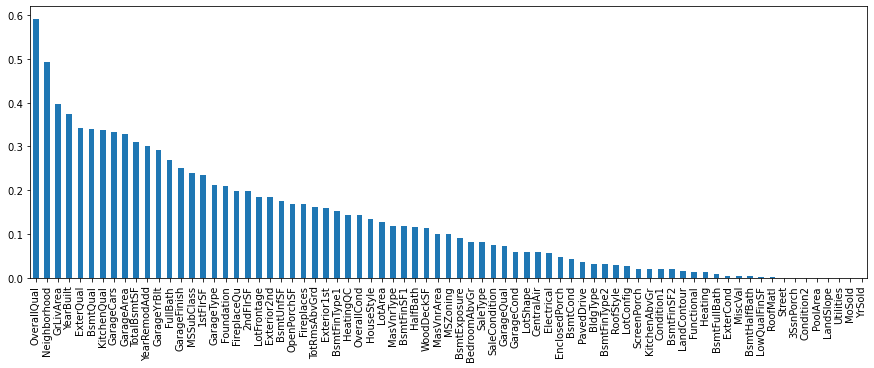

In [90]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [91]:
from sklearn.feature_selection import SelectPercentile

In [92]:
## Selecting the top 30 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=80)
selected_top_columns.fit(X_train_scaled, y_train)

SelectPercentile(percentile=80,
                 score_func=<function mutual_info_regression at 0x000001ECA0658D30>)

In [94]:
X_train_top_80 = list(X_train_scaled.columns[selected_top_columns.get_support()])
len(X_train_top_80)

60

In [111]:
X_train_feature = X_train_scaled[X_train_scaled.columns[X_train_scaled.columns.isin(X_train_top_80)]]
X_test_feature = X_test_scaled[X_test_scaled.columns[X_test_scaled.columns.isin(X_train_top_80)]]
df_test_feature = df_test[df_test.columns[df_test.columns.isin(X_train_top_80)]]

In [112]:
X_train_feature.shape, df_test_feature.shape

((996, 60), (1460, 60))

In [113]:
model.fit(X_train_feature,y_train)

LinearRegression()

In [114]:
prediction = model.predict(X_test_feature)

In [115]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, prediction)


0.0798864703331528

In [116]:
metrics.mean_squared_error(y_test, prediction)

0.011657993374134723

In [117]:
r2_score = model.score(X_test_feature, y_test)
print('R2 Score:', r2_score*100,'%')


R2 Score: 91.26897871790152 %


In [118]:
predictions = model.predict(df_test_feature)

In [120]:
submission = df_train[['Id']]
submission['SalePrice'] = predictions

<ipython-input-120-9f55666fb3b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['SalePrice'] = predictions


In [121]:
submission

,Id,SalePrice
0,1,6.787418e+12
1,2,1.026683e+13
2,3,8.423915e+12
3,4,7.681189e+12
4,5,1.027658e+13
5,6,5.999236e+12
6,7,1.345789e+13
7,8,6.978688e+12
8,9,1.079839e+13
9,10,7.718563e+12


In [122]:
submission.to_csv(path_or_buf = 'submission.csv', \
                   sep = ',', index = False)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train_feature,y_train)
ridge_predict = ridge.predict(X_test_feature)
print('Ridge score: ',ridge.score(X_test_feature,y_test)*100,'%')

In [ ]:
metrics.mean_absolute_error(y_test, ridge_predict)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_lasso = Lasso(alpha=5e-4, max_iter=50000).fit(X_train_feature, y_train)

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train_feature.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

In [ ]:
# This is a good way to see how model predict data
p_pred = np.expm1(model_lasso.predict(X_train_feature))
plt.scatter(p_pred, np.expm1(y_train))
plt.plot([min(p_pred),max(p_pred)], [min(p_pred),max(p_pred)], c="red")

In [ ]:
model_lasso.score(X_test_feature,y_test)

In [ ]:
# DF_predicted = pd.DataFrame(data = {'Id': df_test['Id'], 'SalePrice': ridge_predict})
# print(DF_predicted.info())
# DF_predicted.head(5)

In [ ]:
# DF_predicted.to_csv(path_or_buf = 'submission.csv', \
#                    sep = ',', index = False)

In [ ]:
# df_test.info()

In [ ]:
ID = pd.Series(df_test.index)

In [ ]:
submit_result = pd.concat([ID, pd.DataFrame(ridge_predict)], axis=1)
submit_result.columns=['Id', 'SalePrice']
submit_result

In [ ]:
submit_result.to_csv(path_or_buf = 'submission.csv', \
                   sep = ',', index = False)

In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_RandomForest = RandomForestRegressor()
model_RandomForest.fit(X_train_feature , y_train)
RandomForest_predictions = model_RandomForest.predict(X_test_feature)

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, RandomForest_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
# print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))
r2 = r2_score(y_test, RandomForest_predictions)
r2_rounded = r2_score(y_test, RandomForest_predictions).round(2)

In [ ]:
new_df['GarageYrBlt'].fillna(new_df['GarageYrBlt'].mean())

In [ ]:
test_RandomForest_predictions = model.predict(new_df)